#  Code

In [1]:
# Utilized pandas,seaborn to clean,explore and visualize the data acquired via webscraping

In [5]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

import pandas as pd

df = pd.DataFrame()

def api_runner():
    
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'5000',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['TimeStamp']= pd.to_datetime('now')
    df

    #Creating a CSV and appending the data

    if not os.path.isfile(r'C:\Users\sk\Documents\Jup_Proj1\API.csv'):
        df.to_csv(r'C:\Users\sk\Documents\Jup_Proj1\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\sk\Documents\Jup_Proj1\API.csv',mode='a',header=False)

In [6]:
import os
from time import time
from time import sleep

for i in range(20):
    api_runner()
    print("API runner completed successfully")
    sleep(2)
exit()  

API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully


In [7]:
import pandas as pd
df = pd.read_csv(r'C:\Users\sk\Documents\Jup_Proj1\API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,TimeStamp
0,0,1,Bitcoin,BTC,bitcoin,10542,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19537718.00000,...,51.63020,766459954308.90002,NaN,2023-11-09T21:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 16:53:14.159915
1,1,1027,Ethereum,ETH,ethereum,7742,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120266596.55917,...,17.96740,248065246920.79999,NaN,2023-11-09T21:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 16:53:14.159915
2,2,825,Tether USDt,USDT,tether,65366,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,86263964467.18793,...,6.24700,88640649552.78000,NaN,2023-11-09T21:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-09 16:53:14.159915
3,3,1839,BNB,BNB,bnb,1751,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151702155.92317,...,2.71120,37431807572.75000,NaN,2023-11-09T21:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 16:53:14.159915
4,4,52,XRP,XRP,xrp,1136,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53652766196.00000,...,2.55760,65815159557.56000,NaN,2023-11-09T21:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 16:53:14.159915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114995,4995,18702,Metavault DAO,MVD,metavault,12,2022-03-10T06:25:42.000Z,"['defi', 'smart-contracts', 'staking', 'dao', ...",NaN,0.00000,...,0.00000,0.00000,NaN,2023-11-10T19:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x788B6D2B37Aa51D916F2837Ae25b05f0e61339d1,2023-11-10 14:30:47.345220
114996,4996,28329,Hold On for Dear Life,HODL,hold-on-for-dear-life,1,2023-10-31T13:45:54.000Z,[],1000000000000.00000,0.00000,...,0.00000,199810.53000,NaN,2023-11-10T19:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xe2F98dd7506807EF82d1988aA77c320bC52F8df4,2023-11-10 14:30:47.345220
114997,4997,9281,IMO,IMO,imo,6,2021-04-18T00:00:00.000Z,['bnb-chain'],20000000.00000,0.00000,...,0.00000,3527065.36000,NaN,2023-11-10T19:29:00.000Z,1839.00000,BNB Smart Chain (BEP20),BNB,bnb,0x94d79c325268c898d2902050730f27a478c56cc1,2023-11-10 14:30:47.345220
114998,4998,16531,Antalyaspor Token,AKREP,antalyaspor-token,1,2021-12-28T03:19:39.000Z,[],1000000.00000,0.00000,...,0.00000,955784.63000,NaN,2023-11-10T19:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xb2f87efA44dE3008d6bA75D5e879422003D6dABB,2023-11-10 14:30:47.345220


In [4]:
# Transformation of Scientific notation to normal numbers

pd.set_option('display.float_format',lambda x: '%.5f' % x)

#pd.options.display.float_format = '{:,.2f}'.format

In [8]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,TimeStamp
0,0,1,Bitcoin,BTC,bitcoin,10542,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19537718.00000,...,51.63020,766459954308.90002,NaN,2023-11-09T21:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 16:53:14.159915
1,1,1027,Ethereum,ETH,ethereum,7742,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120266596.55917,...,17.96740,248065246920.79999,NaN,2023-11-09T21:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 16:53:14.159915
2,2,825,Tether USDt,USDT,tether,65366,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,86263964467.18793,...,6.24700,88640649552.78000,NaN,2023-11-09T21:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-09 16:53:14.159915
3,3,1839,BNB,BNB,bnb,1751,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151702155.92317,...,2.71120,37431807572.75000,NaN,2023-11-09T21:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 16:53:14.159915
4,4,52,XRP,XRP,xrp,1136,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53652766196.00000,...,2.55760,65815159557.56000,NaN,2023-11-09T21:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 16:53:14.159915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114995,4995,18702,Metavault DAO,MVD,metavault,12,2022-03-10T06:25:42.000Z,"['defi', 'smart-contracts', 'staking', 'dao', ...",NaN,0.00000,...,0.00000,0.00000,NaN,2023-11-10T19:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x788B6D2B37Aa51D916F2837Ae25b05f0e61339d1,2023-11-10 14:30:47.345220
114996,4996,28329,Hold On for Dear Life,HODL,hold-on-for-dear-life,1,2023-10-31T13:45:54.000Z,[],1000000000000.00000,0.00000,...,0.00000,199810.53000,NaN,2023-11-10T19:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xe2F98dd7506807EF82d1988aA77c320bC52F8df4,2023-11-10 14:30:47.345220
114997,4997,9281,IMO,IMO,imo,6,2021-04-18T00:00:00.000Z,['bnb-chain'],20000000.00000,0.00000,...,0.00000,3527065.36000,NaN,2023-11-10T19:29:00.000Z,1839.00000,BNB Smart Chain (BEP20),BNB,bnb,0x94d79c325268c898d2902050730f27a478c56cc1,2023-11-10 14:30:47.345220
114998,4998,16531,Antalyaspor Token,AKREP,antalyaspor-token,1,2021-12-28T03:19:39.000Z,[],1000000.00000,0.00000,...,0.00000,955784.63000,NaN,2023-11-10T19:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xb2f87efA44dE3008d6bA75D5e879422003D6dABB,2023-11-10 14:30:47.345220


In [9]:
# Displaying coin trends over time

df4 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean('name')
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.23959,2.89276,7.98549,39.26801,48.06749,26.76947
Ethereum,-0.01204,4.88331,15.25674,34.09695,34.57905,13.30151
Tether USDt,0.01923,0.03710,0.01610,0.08368,0.08458,0.10670
BNB,0.01000,2.73057,9.46069,21.67971,21.85090,4.24654
XRP,0.31505,0.65373,8.39564,36.06312,39.86738,5.30075
...,...,...,...,...,...,...
impactMarket,0.17703,-1.47935,-10.16238,-13.47448,-53.29406,-35.12680
Metavault DAO,-0.06402,-0.02623,-0.06561,-3.44831,-3.44831,-14.41826
Hold On for Dear Life,-0.06462,-0.94866,-1.68749,-72.92880,-72.92880,-72.92880


In [10]:
df5 = df4.stack() #converting to series
df5

name                                           
Bitcoin            quote.USD.percent_change_1h      0.23959
                   quote.USD.percent_change_24h     2.89276
                   quote.USD.percent_change_7d      7.98549
                   quote.USD.percent_change_30d    39.26801
                   quote.USD.percent_change_60d    48.06749
                                                     ...   
Antalyaspor Token  quote.USD.percent_change_24h    -6.87979
                   quote.USD.percent_change_7d     -0.31664
                   quote.USD.percent_change_30d    26.12037
                   quote.USD.percent_change_60d   249.11852
                   quote.USD.percent_change_90d   153.73364
Length: 31032, dtype: float64

In [11]:
df6 = df5.to_frame(name='values') #converting again to dataframe
df6

values
name                                                    
Bitcoin           quote.USD.percent_change_1h    0.23959
                  quote.USD.percent_change_24h   2.89276
                  quote.USD.percent_change_7d    7.98549
                  quote.USD.percent_change_30d  39.26801
                  quote.USD.percent_change_60d  48.06749
...                                                  ...
Antalyaspor Token quote.USD.percent_change_24h  -6.87979
                  quote.USD.percent_change_7d   -0.31664
                  quote.USD.percent_change_30d  26.12037
                  quote.USD.percent_change_60d 249.11852
                  quote.USD.percent_change_90d 153.73364

[31032 rows x 1 columns]

In [12]:
df6.count() 

values    31032
dtype: int64

In [14]:
# Since the index is messed up, a new index is created with a set range and passed as the dataframe.

index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
#f7= df6.set_index(index)

# If it only has the index and values try:
df7= df6.reset_index()

df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.23959
1,Bitcoin,quote.USD.percent_change_24h,2.89276
2,Bitcoin,quote.USD.percent_change_7d,7.98549
3,Bitcoin,quote.USD.percent_change_30d,39.26801
4,Bitcoin,quote.USD.percent_change_60d,48.06749
...,...,...,...
31027,Antalyaspor Token,quote.USD.percent_change_24h,-6.87979
31028,Antalyaspor Token,quote.USD.percent_change_7d,-0.31664
31029,Antalyaspor Token,quote.USD.percent_change_30d,26.12037
31030,Antalyaspor Token,quote.USD.percent_change_60d,249.11852


In [21]:
# Change the column name

df7 = df7.rename(columns={'level_1':'percent_change'})
df7 = df7.head(1000)
df7

,name,percent_change,values
0,Bitcoin,1h,0.23959
1,Bitcoin,24h,2.89276
2,Bitcoin,7d,7.98549
3,Bitcoin,30d,39.26801
4,Bitcoin,60d,48.06749
...,...,...,...
85,Wrapped Bitcoin,24h,2.84504
86,Wrapped Bitcoin,7d,7.75678
87,Wrapped Bitcoin,30d,39.11853
88,Wrapped Bitcoin,60d,47.99151


In [22]:
# Changing Value names in a particular coulumns

df7['percent_change']= df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.23959
1,Bitcoin,24h,2.89276
2,Bitcoin,7d,7.98549
3,Bitcoin,30d,39.26801
4,Bitcoin,60d,48.06749
...,...,...,...
85,Wrapped Bitcoin,24h,2.84504
86,Wrapped Bitcoin,7d,7.75678
87,Wrapped Bitcoin,30d,39.11853
88,Wrapped Bitcoin,60d,47.99151


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\sk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


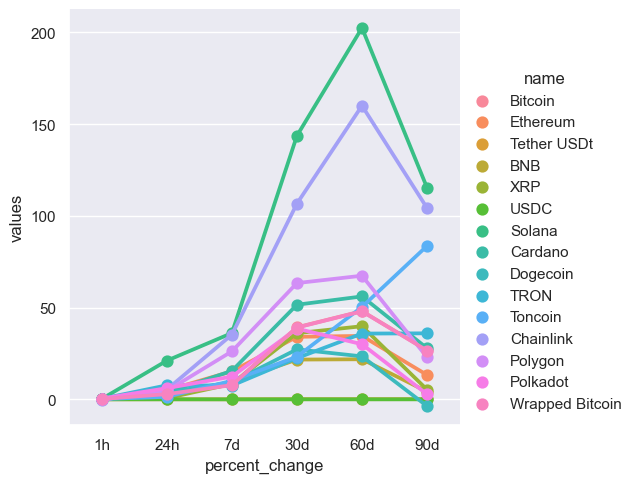

In [24]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point') #hue - legend

In [25]:
# create a dataframe with the columns we want


df9 = df[['name','quote.USD.price','TimeStamp']].head(1000)
df9 = df9.query("name=='Bitcoin'")

df9

,name,quote.USD.price,TimeStamp
0,Bitcoin,36498.09306,2023-11-09 16:53:14.159915


<Axes: xlabel='TimeStamp', ylabel='quote.USD.price'>

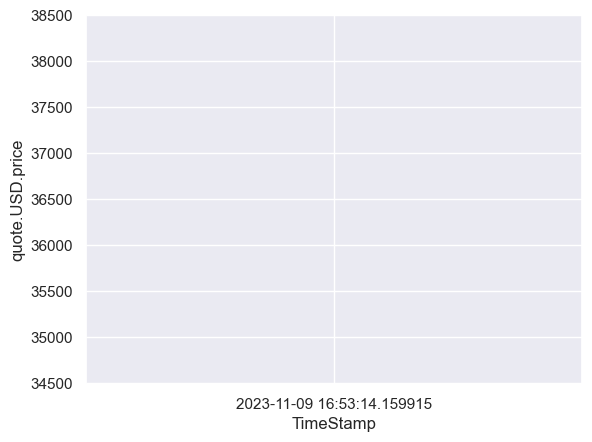

In [26]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='TimeStamp',y='quote.USD.price',data = df9)